In [1]:
import tensorflow as tf

2023-09-06 09:08:54.641526: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-06 09:08:57.132192: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-06 09:08:57.148798: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-06 09:09:06.775297: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [1]:
!pip install scikit-learn-intelex

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
!pip install cvxpy 

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install fairlearn
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
import keras.backend as K
from tensorflow.keras.layers import Lambda
from fairlearn.metrics import demographic_parity_difference
from fairlearn.metrics import equalized_odds_ratio
from fairlearn.metrics import equalized_odds_difference
import numpy as np

Defaulting to user installation because normal site-packages is not writeable


2023-09-06 10:11:45.677035: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-06 10:11:48.366848: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-06 10:11:48.377385: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-06 10:11:59.767771: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [9]:
!wget https://archive.ics.uci.edu/static/public/2/adult.zip
!unzip adult.zip

--2023-09-06 09:13:02--  https://archive.ics.uci.edu/static/public/2/adult.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘adult.zip’

adult.zip               [ <=>                ] 605.70K  3.68MB/s    in 0.2s    

2023-09-06 09:13:02 (3.68 MB/s) - ‘adult.zip’ saved [620237]

Archive:  adult.zip
  inflating: Index                   
  inflating: adult.data              
  inflating: adult.names             
  inflating: adult.test              
  inflating: old.adult.names         


In [6]:
#Cols to be used
cols="age	workclass	fnlwgt	education	educational-num	marital-status	occupation	relationship	race	gender	capital-gain	capital-loss	hours-per-week	native-country	income"
cols=cols.split("\t")

In [7]:
#Importing train and testing data
train=pd.read_csv("adult.data",names=cols)
test=pd.read_csv("adult.test",skiprows=1,names=cols)
train.reset_index()
test.reset_index()

,index,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [8]:
(train.shape,test.shape)

((32561, 15), (16281, 15))

In [9]:
#Preprocessing steps doing

#Changing Male and Female to 1 and 0 respectively
train['gender'].replace(to_replace={' Male':1, ' Female' : 0}, inplace=True)
train['gender'] = train.gender.astype('uint8')

test['gender'].replace(to_replace={' Male':1, ' Female' : 0}, inplace=True)
test['gender'] = test.gender.astype('uint8')


# Convert race to white vs non-white
#There can be different race and the distribution of race is skewed to remove it we are making it white and non-
# White
train.loc[train['race'] != ' White', 'race'] = 'Non-White'
test.loc[test['race'] != ' White', 'race'] = 'Non-White'
train.loc[train['race'] == ' White', 'race'] = 'White'
test.loc[test['race'] == ' White', 'race'] = 'White'

#White is given to be 1 and non-white as 0
train['race'].replace(to_replace={'White':1, 'Non-White':0}, inplace=True)
train['race'] = train.race.astype('uint8')

test['race'].replace(to_replace={'White':1, 'Non-White':0}, inplace=True)
test['race'] = test.race.astype('uint8')

 # Convert native-country to american vs non-american
train.loc[train['native-country'] != ' United-States', 'native-country'] = 'Non-US'
train.loc[train['native-country'] == ' United-States', 'native-country'] = 'US'
test.loc[test['native-country'] != ' United-States', 'native-country'] = 'Non-US'
test.loc[test['native-country'] == ' United-States', 'native-country'] = 'US'
train['native-country'].replace(to_replace={'US':1, 'Non-US':0}, inplace=True)
train['native-country'] = train['native-country'].astype('uint8')

test['native-country'].replace(to_replace={'US':1, 'Non-US':0}, inplace=True)
test['native-country'] = test['native-country'].astype('uint8')


In [10]:
train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,1,1,2174,0,40,1,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,1,1,0,0,13,1,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,1,1,0,0,40,1,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,1,0,0,40,1,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,0,0,40,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,1,0,0,0,38,1,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,1,1,0,0,40,1,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,1,0,0,0,40,1,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,1,1,0,0,20,1,<=50K


In [11]:
#Replacing the target variable income i.e >50k 1 and <=50k 0 respectvely
train.replace({" <=50K":0," >50K":1},inplace=True)
test.replace({" <=50K.":0," >50K.":1},inplace=True)

In [12]:
train.race.value_counts()

race
1    27816
0     4745
Name: count, dtype: int64

In [13]:
#Listing out all the numeric columns
numeric_cols=list(train.select_dtypes(exclude=['object']).columns)
numeric_cols.remove('race')
numeric_cols.remove('gender')
numeric_cols.remove('native-country')
numeric_cols.remove('income')
numeric_cols

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [14]:
#Listing out all the object columns
categorized_columns=list(train.select_dtypes(['object']).columns)
categorized_columns

['workclass', 'education', 'marital-status', 'occupation', 'relationship']

In [15]:
#Applying Standard Scaling to on all the numeric cols to make the mean 0 and variance 1
from sklearn.preprocessing import StandardScaler
rb=StandardScaler()
train[numeric_cols]=rb.fit_transform(train[numeric_cols])
test[numeric_cols]=rb.transform(test[numeric_cols])

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse i

In [16]:
#All the object columns are convert to OneHot encoded vector using Onehot Encoder
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder(drop="first",handle_unknown='ignore',sparse_output=False)
train_n=onehot.fit_transform(train[categorized_columns])
test_n=onehot.transform(test[categorized_columns])

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future vers

In [17]:
#This is the combining step where we are combining the the standard scaler applied and one hot vector to make the final data for processing
train_n=pd.DataFrame(train_n,columns=onehot.get_feature_names_out())
test_n=pd.DataFrame(test_n,columns=onehot.get_feature_names_out())

train_d=train.drop(categorized_columns,axis=1)
test_d=test.drop(categorized_columns,axis=1)

train_n=pd.concat([train_d,train_n],axis=1)
test_n=pd.concat([test_d,test_n],axis=1)

In [18]:
#Dropping target variable
test_n_target=test_n.income
test_n.drop("income",axis=1,inplace=True)

In [19]:
#Splitting of test data in Test and Validation
X_test,X_val,y_test,y_val=train_test_split(test_n,test_n_target,random_state=1,test_size=.2)

X_val_g=X_val.gender
X_val.drop("gender",axis=1,inplace=True)

X_test_g=X_test.gender
X_test.drop("gender",axis=1,inplace=True)

In [20]:
def multiply(x):
    v1,v2 = x
    if v1.shape!=v2.shape:
        v2=K.stack([v2]*v1.shape[-1], axis=-1)
        return v1*v2
    else:
        return v1*v2

In [21]:
#Training data preprocessing
x_train=train_n.copy()
Y_train=x_train.income
X_train=x_train.copy()
X_train.drop("income",axis=1,inplace=True)
gender=X_train.gender
X_train.drop("gender",axis=1,inplace=True)

In [22]:
X_train.shape

(32561, 56)

Model Architecture
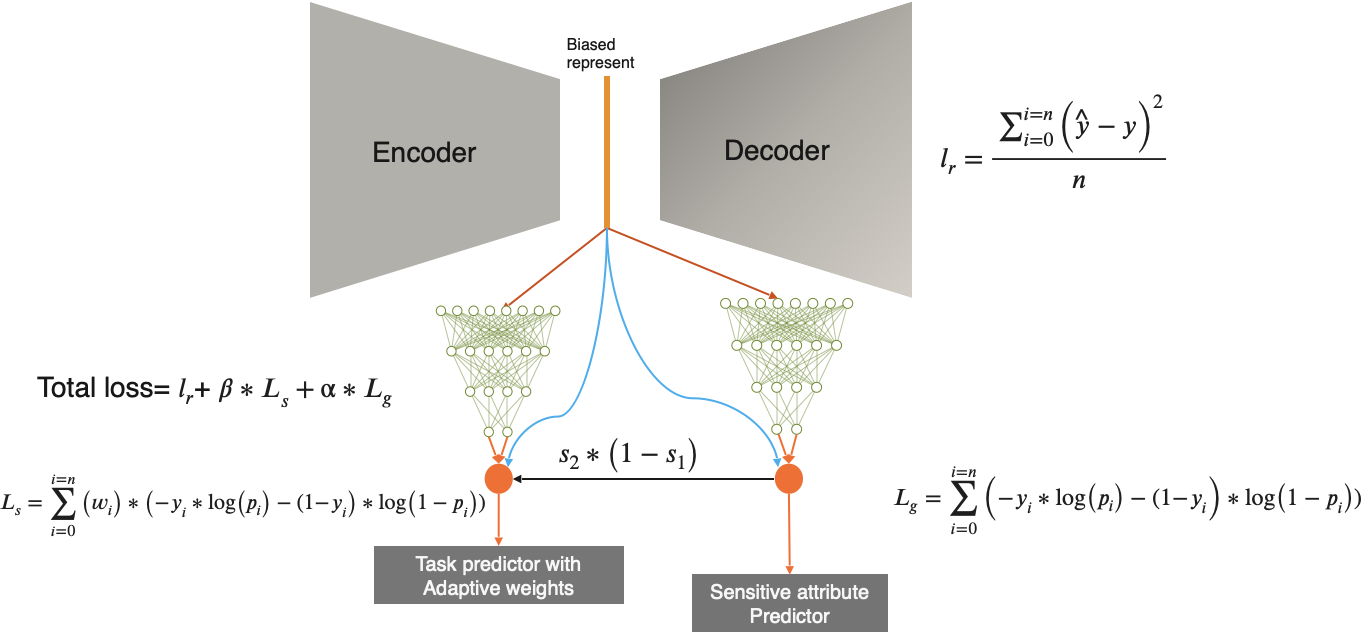

In [23]:
#Ours Architecture

input_layer=Input(shape=(X_train.shape[-1],),)
kernel=tf.keras.initializers.glorot_uniform
#Encoder block
x=Dense(64,activation="relu",kernel_initializer=kernel)(input_layer)
x=BatchNormalization()(x)
x=Dense(32,activation="relu",kernel_initializer=kernel)(x)
x=BatchNormalization()(x)
x=Dense(32,activation="relu",kernel_initializer=kernel)(x)
x=BatchNormalization()(x)
latent=Dense(16,activation="relu",kernel_initializer=kernel,name="latent_vector")(x)

#Decoder Block

z=Dense(32,activation="relu",kernel_initializer=kernel)(latent)
z=BatchNormalization()(z)
z=Dense(32,activation="relu",kernel_initializer=kernel)(z)
z=BatchNormalization()(z)
z=Dense(64,activation="relu",kernel_initializer=kernel)(z)
z=BatchNormalization()(z)
decoded=Dense(X_train.shape[-1],activation="relu",kernel_initializer=kernel,name="autoencoder")(z)

#Now Latent is distibuted in two parts

z1=Dense(8,activation="relu",kernel_initializer=kernel)(latent)
z1=BatchNormalization()(z1)
z1=Dense(16,activation="sigmoid",kernel_initializer=kernel,name="gender_free")(z1)

#This is the gender bias sigmoid part

z2=Dense(8,activation="relu",kernel_initializer=kernel)(latent)
z2=BatchNormalization()(z2)
z2=Dense(16,activation="sigmoid",kernel_initializer=kernel,name="gender_bias",)(z2)

#Assuming gender bias component
gender_bias=Lambda(multiply)([z2,latent])

z1=Lambda(multiply)([latent,z1])

#Assuming gender free component
gender_free=Lambda(multiply)([z1,1-z2])

#This task is to predict the gender correctly
z3=Dense(16,activation="relu",kernel_initializer=kernel)(gender_bias)
z3=Dropout(.2)(z3)
z3=Dense(8,activation="relu",kernel_initializer=kernel)(z3)
z3=Dropout(.2)(z3)
gender_output=Dense(1,activation='sigmoid',kernel_initializer=kernel,name="classification_gender")(z3)

#Downstream Task to predict the Output label

y=Dense(16,activation="relu",kernel_initializer=kernel)(gender_free)
y=Dropout(.2)(y)
y=Dense(8,activation="relu",kernel_initializer=kernel)(y)
y=Dropout(.2)(y)
output=Dense(1,activation='sigmoid',kernel_initializer=kernel,name="classification")(y)

base=Model(inputs=input_layer,outputs=[decoded,gender_output,output])

In [24]:
import keras.backend as K
losses = {
    "autoencoder": "mse",
    "classification":"binary_crossentropy",
    "classification_gender":"binary_crossentropy"
}

loss_weights = {
    "autoencoder": 1.0,
    "classification":3,
    "classification_gender":2
}

metrics = {
    "autoencoder": "mse",
    "classification": ["accuracy","Precision","Recall"],
    "classification_gender":["accuracy","Precision","Recall"]
}

base.compile(loss=losses,loss_weights=loss_weights, optimizer=tf.keras.optimizers.legacy.Adam(1e-3), metrics=metrics)

base.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 56)]                 0         []                            
                                                                                                  
 dense (Dense)               (None, 64)                   3648      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 64)                   256       ['dense[0][0]']               
 Normalization)                                                                                   
                                                                                                  
 dense_1 (Dense)             (None, 32)                   2080      ['batch_normalization[0][0

In [25]:
import numpy as np
from keras.callbacks import LearningRateScheduler
#This is the learning rate scheduler
def step_decay_schedule(initial_lr=1e-4, decay_factor=0.75, step_size=10):
    '''
    Wrapper function to create a LearningRateScheduler with step decay schedule.
    '''
    def schedule(epoch):
        return initial_lr * (decay_factor ** np.floor(epoch/step_size))

    return LearningRateScheduler(schedule)

lr_sched = step_decay_schedule(initial_lr=1e-4, decay_factor=0.75, step_size=2)

We are using cvxpy Library to Solve this optimisation Reweighing problem
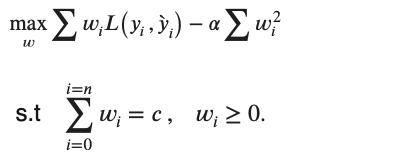

In [26]:
from sklearn.metrics import log_loss
import math
import cvxpy as cp

#Solving the optimization problem  
def optim(loss, a, c):
  A = loss
  x = cp.Variable(loss.shape[0])
  objective = cp.Maximize(-a*cp.sum_squares(x)+cp.sum(cp.multiply(A,x)))
  constraints = [0 <= x, cp.sum(x) == c]
  prob = cp.Problem(objective, constraints)
  result = prob.solve()
  for i in range(x.value.shape[0]):
    if abs(x.value[i]) < 0.01 or x.value[i] < 0:
      x.value[i] = 0
  x.value = x.value
  return x.value

def dif(a, b):
  sum = 0
  for i in range(len(a)):
    sum += (a[i] - b[i]) ** 2
  sum0 = sum ** 0.5
  return sum0

In [27]:
import time
def Random_search(train, folds, param_range, num_param = 1):
    trainscore = []
    testscore = []
    K_values = sample(range(param_range[0],param_range[1]),num_param)
    K_values.sort()
    print('k range:',K_values)
    models=[]
    for k in tqdm(K_values):
        trainscore_folds = []
        testscore_folds = []
        for j in range(0, folds):
            k=48
            x_train=train_n.copy()
            iter = 0
            wi0 = np.ones((x_train.shape[0]))
            wi1 = wi0 + 10000000000000

            x_train_m=x_train[x_train.gender==1].copy()
            x_train_f=x_train[x_train.gender==0].copy()
            g_m=x_train_m.gender
            g_f=x_train_f.gender
            x_train_m.drop("gender",axis=1,inplace=True)
            x_train_f.drop("gender",axis=1,inplace=True)
            x_train_mp=x_train_m[x_train_m.income==1].copy()
            x_train_mn=x_train_m[x_train_m.income==0].copy()

            mp_label=x_train_mp.income
            mn_label=x_train_mn.income
            x_train_mp.drop("income",axis=1,inplace=True)
            x_train_mn.drop("income",axis=1,inplace=True)

            x_train_fp=x_train_f[x_train_f.income==1].copy()
            x_train_fn=x_train_f[x_train_f.income==0].copy()

            fp_label=x_train_fp.income
            fn_label=x_train_fn.income

            x_train_fp.drop("income",axis=1,inplace=True)
            x_train_fn.drop("income",axis=1,inplace=True)

            loss_mp = wi0_mp = np.ones(x_train_mp.shape[0])
            loss_mn = wi0_mn = np.ones(x_train_mn.shape[0])
            loss_fp = wi0_fp = np.ones(x_train_fp.shape[0])
            loss_fn = wi0_fn = np.ones(x_train_fn.shape[0])

            Y_train=x_train.income
            X_train=x_train.copy()
            X_train.drop("income",axis=1,inplace=True)
            gender=X_train.gender
            X_train.drop("gender",axis=1,inplace=True)
            Main=Model(inputs=input_layer,outputs=[decoded,gender_output,output])
            while iter<6:
                Main.compile(loss=losses,loss_weights=loss_weights, optimizer=tf.keras.optimizers.legacy.Adam(1e-4), metrics=metrics)
                start=time.time()
                hist = Main.fit(X_train,
                     {"autoencoder":X_train,  "classification":Y_train,
                      "classification_gender":gender},
                     verbose=1,
                     batch_size=32,
                     epochs=5,
                     sample_weight={"classification":pd.Series(wi0).to_frame("weight")},
                     validation_data=(X_val,{"autoencoder": X_val, "classification": y_val,
                                              "classification_gender":X_val_g}),
                     callbacks=[lr_sched])
                loss_mp = -(tf.math.log(Main.predict(x_train_mp)[2]+1e-10)).numpy().squeeze()
                loss_mn = -(tf.math.log(1-Main.predict(x_train_mn)[2]+1e-10)).numpy().squeeze()
                loss_fp = -(tf.math.log(Main.predict(x_train_fp)[2]+1e-10)).numpy().squeeze()
                loss_fn = -(tf.math.log(1-Main.predict(x_train_fn)[2]+1e-10)).numpy().squeeze()

                wi1 = wi0
                wi0_bp_1 = optim(loss_mp, k, x_train_mp.shape[0]//10)
                wi0_bn_1 = optim(loss_mn, k, x_train_mn.shape[0]//10)
                wi0_wp_1 = optim(loss_fp, k, x_train_fp.shape[0]//10)
                wi0_wn_1 = optim(loss_fn, k, x_train_fn.shape[0]//10)
                end=time.time()
                X_train = pd.concat([x_train_mp, x_train_mn, x_train_fp, x_train_fn],axis=0)
                Y_train = pd.concat((mp_label, mn_label, fp_label, fn_label),axis=0)
                wi0 = np.concatenate([wi0_bp_1, wi0_bn_1, wi0_wp_1, wi0_wn_1],axis=0)
                gender=pd.concat([g_m,g_f],axis=0)
                print(f"Running {iter}-{dif(wi0, wi1)} and time is {end-start}")
                iter = iter + 1
            Y_predicted = Main.predict(X_test)[1].squeeze()>.5
            testscore_folds.append(np.sum(y_test == Y_predicted)/len(y_test))
            Y_predicted = Main.predict(X_train)[1].squeeze()>.5
            trainscore_folds.append(np.sum(Y_train == Y_predicted)/len(Y_train))
            models.append(Main)
            print(f"accuracy is {np.sum(Y_train == Y_predicted)/len(Y_train)}")
        trainscore.append(np.mean(np.array(trainscore_folds)))
        testscore.append(np.mean(np.array(testscore_folds)))
    return trainscore, testscore , K_values,models


In [28]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random
import warnings
from tqdm import tqdm

warnings.filterwarnings("ignore")

from random import sample
c=100
param_min = 20
param_max = 100
k_fold = 1
param_range = (param_min, param_max)
trainscore, testscore, K_values,models = Random_search(x_train, k_fold, param_range)

In [31]:
model3=base

In [32]:
model3.load_weights("adult_weights.h5")

In [33]:
#Total Accuracy of Male and Female on trained model
Male=X_test[X_test_g==1]
Female=X_test[X_test_g==0]
Male_target=y_test[X_test_g==1]
Female_target=y_test[X_test_g==0]

print(f"The Accuracy for Male  is {((model3.predict(Male)[2].squeeze()>.5)==Male_target).sum()/Male_target.shape[0]}")
print(f"The Accuracy for Female  is {((model3.predict(Female)[2].squeeze()>.5)==Female_target).sum()/Female_target.shape[0]}")


272/272 [==============================] - 2s 2ms/step
The Accuracy for Male  is 0.818871394092633
136/136 [==============================] - 0s 1ms/step
The Accuracy for Female  is 0.9269026139255147


In [34]:
#Class wise accuracy and Class wise gender Accuracy
Class_0=X_test[y_test==0]
Class_1=X_test[y_test==1]
Class_0_g=X_test_g[y_test==0]
Class_1_g=X_test_g[y_test==1]
Class_0_target=y_test[y_test==0]
Class_1_target=y_test[y_test==1]


print(f"The class accuracy for class 0 is {((model3.predict(Class_0)[2].squeeze()>.5)==Class_0_target).sum()/Class_0_target.shape[0]}")
print(f"The class accuracy for class 1 is {((model3.predict(Class_1)[2].squeeze()>.5)==Class_1_target).sum()/Class_1_target.shape[0]}")


gender={1:' Male', 0:' Female'}
for x,_ in Class_0_g.value_counts().items():
    print(x)
    idx=Class_0_g==x
    print(f"The Class 0 and Gender {gender[x]} accuracy is {((model3.predict(Class_0[idx])[2].squeeze()>.5)==Class_0_target[idx]).sum()/Class_0_target[idx].shape[0]}")

for x,_ in Class_1_g.value_counts().items():
    idx=Class_1_g==x
    print(f"The Class 1 and Gender {gender[x]} accuracy is {((model3.predict(Class_1[idx])[2].squeeze()>.5)==Class_1_target[idx]).sum()/Class_1_target[idx].shape[0]}")

312/312 [==============================] - 0s 1ms/step
The class accuracy for class 0 is 0.9425414364640884
96/96 [==============================] - 0s 1ms/step
The class accuracy for class 1 is 0.5698924731182796
1
192/192 [==============================] - 0s 1ms/step
The Class 0 and Gender  Male accuracy is 0.9215044971381848
0
120/120 [==============================] - 0s 1ms/step
The Class 0 and Gender  Female accuracy is 0.9760416666666667
81/81 [==============================] - 0s 2ms/step
The Class 1 and Gender  Male accuracy is 0.5761794276875484
16/16 [==============================] - 0s 1ms/step
The Class 1 and Gender  Female accuracy is 0.5362318840579711


In [35]:
print(f"Overall accuracy is {((model3.predict(X_test)[2].squeeze()>.5)==y_test).sum()/y_test.shape[0]}")

407/407 [==============================] - 1s 2ms/step
Overall accuracy is 0.8547297297297297


In [36]:
#Model evaluation on Male,Female and total_Test data
def model_eval(actual, pred):
    actual.reset_index()
    confusion = pd.crosstab(actual, pred, rownames=['Actual'], colnames=['Predicted'])
    TP = confusion.loc[1,1]
    TN = confusion.loc[0,0]
    FP = confusion.loc[0,1]
    FN = confusion.loc[1,0]
    out = {}
    out['ALL'] = (TP+TN+FP+FN)
    out['DP'] = (TP+FP)/(TP+TN+FP+FN)
    out['TPR'] =  TP/(TP+FN)
    out['TNR'] = TN/(FP+TN)
    out['FPR'] = FP/(FP+TN)
    out['FNR'] = FN/(TP+FN)
    out['ACR'] = (TP+TN)/(TP+TN+FP+FN)

    return out

Male=X_test[X_test_g==1]
Female=X_test[X_test_g==0]
Male_target=y_test[X_test_g==1]
Female_target=y_test[X_test_g==0]

r1=model_eval(Male_target,np.array(model3.predict(Male)[2].squeeze()>.5,dtype=np.int32))
r2=model_eval(Female_target,np.array(model3.predict(Female)[2].squeeze()>.5,dtype=np.int32))
r3=model_eval(y_test,np.array(model3.predict(X_test)[2].squeeze()>.5,dtype=np.int32))

407/407 [==============================] - 1s 2ms/step


In [37]:
DI = round(100 * abs(r2['DP'] - r1['DP']), 4)
DFPR = round(100 * abs(r2['TNR'] - r1['TNR']), 4)
DFNR = round(100 * abs(r2['TPR'] - r1['TPR']), 4)
prule = round(100 * min(r2['DP'] / r1['DP'], r1['DP'] / r2['DP']), 4)
ACR = round(r3['ACR']*100, 4)

print(f'Baseline method: Average accuracy is {ACR}%, Disparate impact is {DI}%, disparate TPR is {DFNR}%,\n disparate TNR is {DFPR}%, p% rule is {prule}%.')

Baseline method: Average accuracy is 85.473%, Disparate impact is 14.5217%, disparate TPR is 3.9948%,
 disparate TNR is 5.4537%, p% rule is 35.8612%.
